# Handwritten Digit Classification

When you deposit a check in an ATM, how does the machine recognize the amount on the check?

<img src="data/check.jpeg" width="400" />

The US Postal Service uses the zip code to sort mail automatically. How does it recognize the zip code on the envelope?

<img src="data/envelope.png" width="400" />

One of the early successes of machine learning was solving this problem of handwritten digit classification.

In this notebook, you will train a machine learning model on the same MNIST data set. This dataset is an example of **image data**.

## Exercise 0

The training data is available at https://datasci112.stanford.edu/data/mnist/train.csv. Read in this training data.

How are the digits represented? What is each row? What are the columns?

In [22]:
# ! cd data && wget https://datasci112.stanford.edu/data/mnist/train.csv

import pandas as pd

df = pd.read_csv("data/train.csv")
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


Let's view image 0 in this data set. To do this, we need to grab the 784 pixels and reshape it to a $28 \times 28$ image.

- You can reshape a Pandas `Series` to a 2D array by calling `Series.values.reshape(nrow, ncol)`.
- You can view a 2D array as an image using the function `plt.imshow()`. (If you want to view the image on the original grayscale, specify `cmap="gray"`. The available colormaps are listed [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html).)

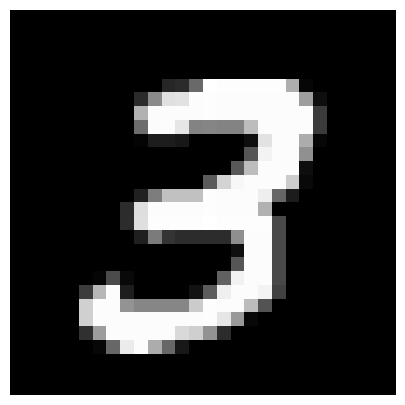

In [23]:
import matplotlib.pyplot as plt

# drop the class column
df_image = df.drop(labels="class", axis=1)

plt.figure(figsize=(10, 5))
plt.imshow(df_image.iloc[0, :].values.reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

## Exercise 1

Train a 10-nearest neighbors model to predict the digit. (You do not need to scale the features because they are already on roughly the same scale.)

What is the training accuracy?

In [24]:
# create the 10-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

X_train = df_image.values
y_train = df["class"].values

classifier = KNeighborsClassifier(n_neighbors=10, metric="euclidean")

classifier.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [25]:
# cross-validation for the classifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_train, y_train, cv=10)
scores.mean()
# training accuracy: 0.92

np.float64(0.9274000000000001)

## Exercise 2

Make a confusion matrix of the training predictions. Which two digits are most frequently confused?

Display a couple of the misclassified digits. Can you see why they were misclassified?

In [26]:
# check count of training examples per class
df.groupby('class').size()

class
0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
dtype: int64

In [ ]:
# Split the data into training and validation datasets
df_train = df.groupby('class').sample(frac=0.5)
df_val = df.drop(df_train.index)

In [58]:
# create the 10-nearest neighbors classifier using training data
from sklearn.neighbors import KNeighborsClassifier

X_train = df_train.drop('class', axis=1).values
y_train = df_train['class'].values

classifier = KNeighborsClassifier(n_neighbors=10, metric="euclidean")

classifier.fit(X_train, y_train)

# predict the validation set
X_val = df_val.drop('class', axis=1).values
y_true = df_val['class'].values
y_pred = classifier.predict(X_val)

In [38]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm

array([[238,   1,   0,   0,   1,   3,   6,   1,   0,   0],
       [  0, 249,   0,   0,   0,   0,   0,   0,   1,   0],
       [  3,  18, 206,   0,   1,   5,   1,  12,   3,   1],
       [  0,   7,   1, 229,   0,   7,   0,   5,   0,   1],
       [  1,   9,   2,   0, 220,   0,   0,   0,   0,  18],
       [  2,  12,   0,   3,   1, 220,   4,   0,   1,   7],
       [  4,   6,   0,   0,   0,   0, 240,   0,   0,   0],
       [  2,  10,   1,   0,   4,   0,   0, 227,   0,   6],
       [  2,  16,   1,  10,   2,  11,   2,   3, 195,   8],
       [  1,   1,   0,   3,   3,   1,   0,   9,   1, 231]])

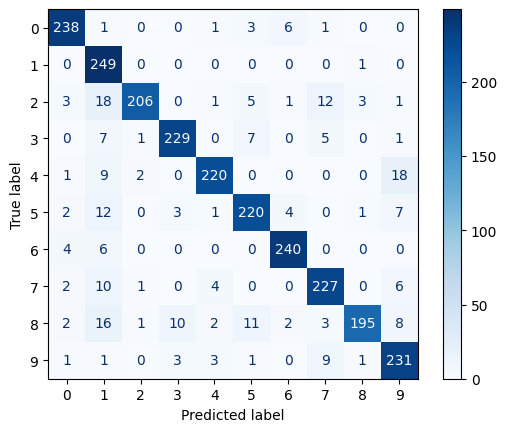

In [42]:
# visualize confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap='Blues')
plt.show()

Predicted label: 7, True label: 3


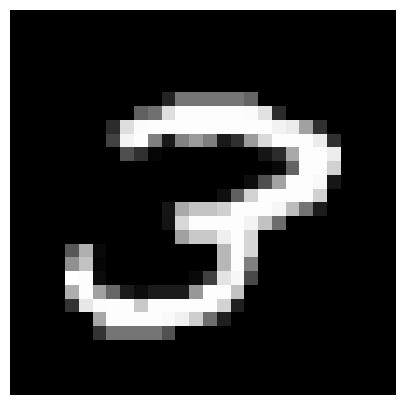

Predicted label: 1, True label: 7


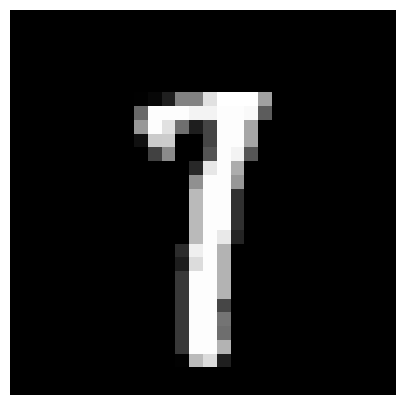

Predicted label: 3, True label: 8


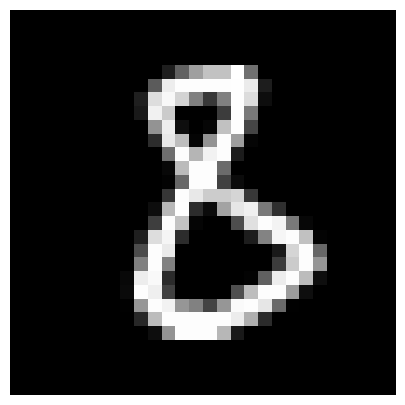

Predicted label: 9, True label: 4


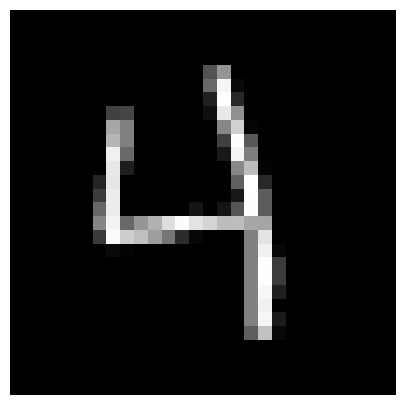

Predicted label: 1, True label: 6


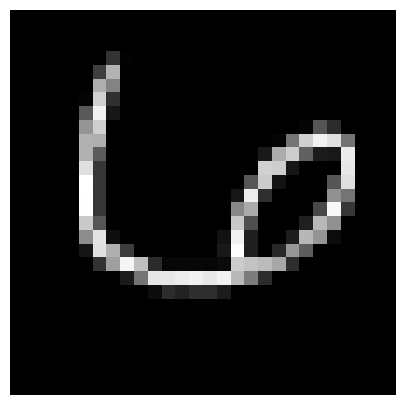

In [ ]:
# display some misclassified examples

df_val['y_pred'] = y_pred
misclassified = df_val.loc[df_val['class'] != df_val['y_pred']].head(5)
misclassified_image = misclassified.drop(['class', 'y_pred'], axis=1)

for i in range(misclassified.shape[0]):
    print(f"Predicted label: {misclassified['y_pred'].iloc[i]}, True label: {misclassified['class'].iloc[i]}")
    plt.figure(figsize=(10, 5))
    plt.imshow(misclassified_image.iloc[i, :].values.reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.show()

## 📊 혼동 행렬 (Confusion Matrix) by Copilot

혼동 행렬은 분류 모델의 성능을 평가하기 위한 표로, 모델의 예측 결과와 실제 값을 비교하여 어떤 종류의 오류가 발생했는지를 시각적으로 보여줍니다.

### 🔹 구성 요소
|실제 / 예측	 |Positive 예측	 |Negative 예측           |  
|---------------|-------------------|-------------------|
|실제 Positive	 |TP (True Positive) |FN (False Negative)|
|실제 Negative	 |FP (False Positive)|TN (True Negative)  |

- **TP (True Positive):** 실제도 Positive, 예측도 Positive
- **TN (True Negative):** 실제도 Negative, 예측도 Negative
- **FP (False Positive):** 실제는 Negative, 예측은 Positive (1종 오류)
- **FN (False Negative):** 실제는 Positive, 예측은 Negative (2종 오류)

### 📐 주요 평가 지표
- **정확도 (Accuracy)**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **정밀도 (Precision)** 

$$ 
\text{Precision} = \frac{TP}{TP + FP}
$$

- **재현율 (Recall)** 

$$ 
\text{Recall} = \frac{TP}{TP + FN} 
$$

- **F1 점수 (F1-Score)**

$$ 
\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} 
$$

- **특이도 (Specificity)** 

$$
 \text{Specificity} = \frac{TN}{TN + FP} 
$$

### 🐶 예시: 강아지 이미지 분류

|               | 예측: 강아지 | 예측: 강아지 아님 |
|---------------|--------------|-------------------|
| 실제: 강아지   | TP           | FN                |
| 실제: 강아지 아님 | FP           | TN                |

### 📌 참고

혼동 행렬은 특히 클래스 불균형이 있는 데이터셋에서 모델의 성능을 더 정확히 평가할 수 있는 도구입니다. 정확도 외에도 정밀도, 재현율, F1 점수 등을 함께 고려해야 합니다.


## Exercise 3

Determine the optimal value of $k$ in terms of accuracy.

<Axes: >

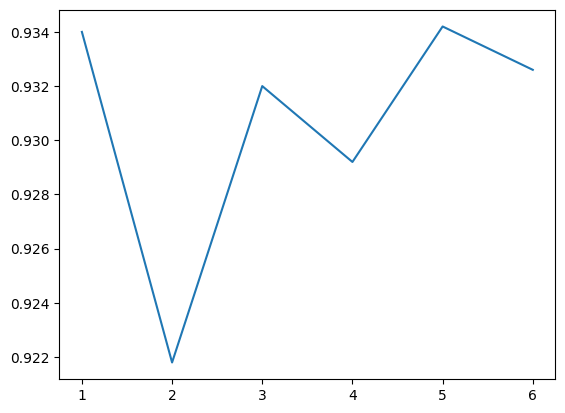

In [ ]:
# find the best value of k

# create the 10-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

X_train = df_image.values
y_train = df["class"].values

k_values, test_accuracies = range(1, 7), []

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    scores = cross_val_score(
        classifier, X_train, y_train, 
        scoring='accuracy', cv=10
    )
    test_accuracies.append(scores.mean())

pd.Series(test_accuracies, index=k_values).plot()


In [69]:
# do grid search
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(
    classifier,
    param_grid={
        'n_neighbors': range(1, 7),
        'metric': ['euclidean', 'manhattan']
    },
    scoring='accuracy',
    cv=10
)

grid_cv.fit(X_train, y_train)
grid_cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

결론 :
- 제일 optimal한 metric은 euclidean 
- 제일 optimal한 k값은 5

## Exercise 4

Read in the test data, available at https://datasci112.stanford.edu/data/mnist/test.csv.

Use the best model from Exercise 3 to classify these digits. How would you check these predictions?

In [71]:
# ! cd data && wget https://datasci112.stanford.edu/data/mnist/test.csv

import pandas as pd

X_test = pd.read_csv("data/test.csv")
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# predict the class of a test dataset
from sklearn.neighbors import KNeighborsClassifier

X_train = df.drop("class", axis=1)
y_train = df["class"]

# use the beet model from Exercise 3
classifier = KNeighborsClassifier(**grid_cv.best_params_)

classifier.fit(X=X_train, y=y_train)

y_test = classifier.predict(X_test)

Predicted label: 6


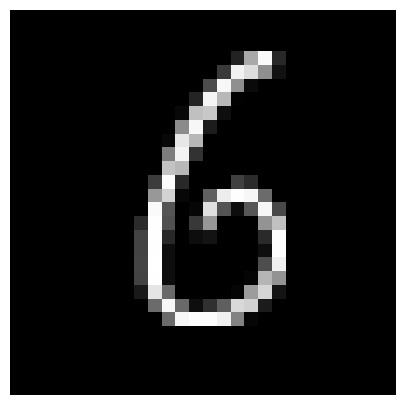

Predicted label: 0


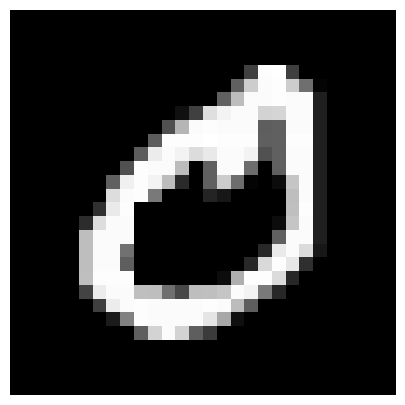

Predicted label: 2


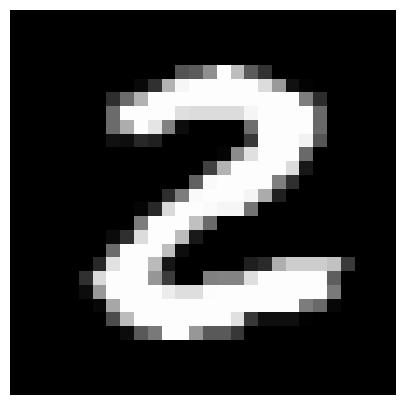

Predicted label: 9


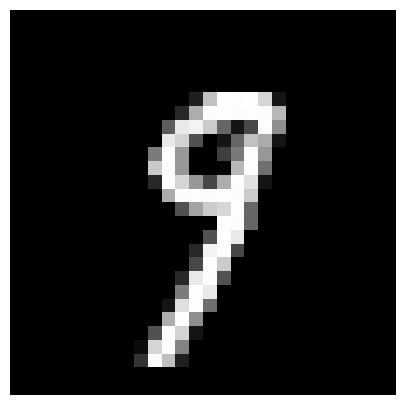

Predicted label: 4


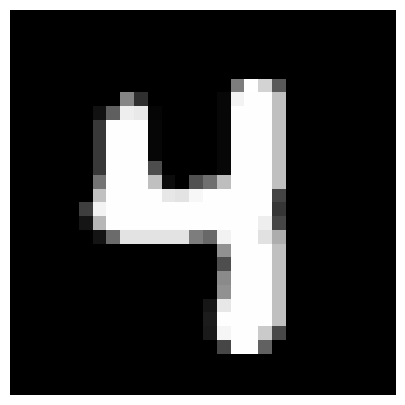

Predicted label: 4


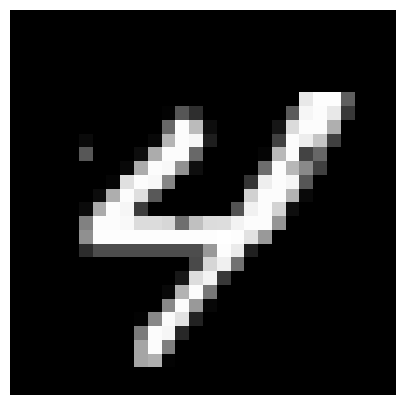

Predicted label: 4


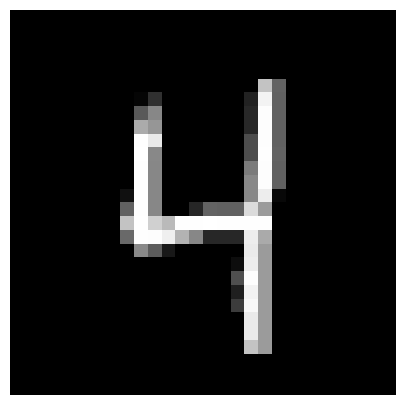

Predicted label: 1


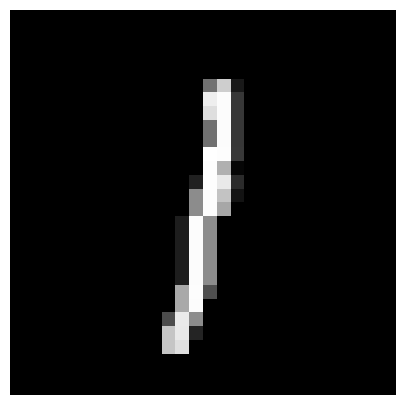

Predicted label: 1


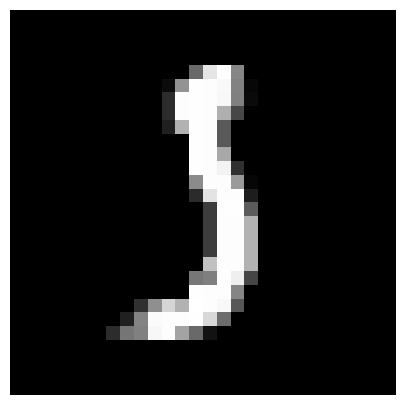

Predicted label: 1


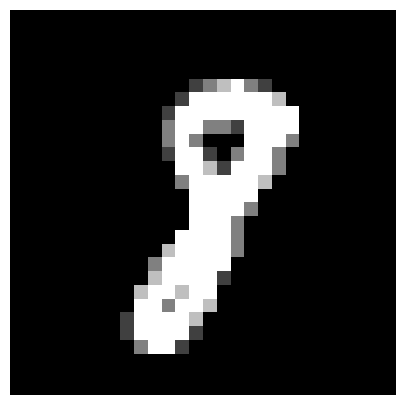

In [79]:
# display some examples

X_test['pred_class'] = y_test

for i in range(0, 10):
    print(f"Predicted label: {X_test['pred_class'].iloc[i]}")
    plt.figure(figsize=(10, 5))
    plt.imshow(X_test.iloc[i, :-1].values.reshape(28, 28), cmap="gray")
    plt.axis("off")
    plt.show()

## 📊 라벨 없는 테스트 데이터에 대한 분류 모델 평가 방법 by Copilot

라벨이 없는 테스트 데이터에 대해 분류(Classification) 모델을 평가하는 주요 방법들과 그 장단점을 아래에 정리했습니다.

---

### 🧪 1. 예측 분포 분석

- **설명**: 모델의 예측 클래스 분포가 학습 데이터의 클래스 분포와 유사한지 확인
- **장점**:
  - 라벨 없이도 모델의 편향 탐지 가능
  - 학습 데이터와의 일관성 확인
- **단점**:
  - 실제 성능은 알 수 없음
  - 클래스 비율이 불균형한 경우 해석 어려움

---

### 📊 2. 클러스터링 기반 평가

- **설명**: 예측된 클래스별로 데이터 클러스터링 후 구조적 일관성 확인 (t-SNE, PCA 등 활용)
- **장점**:
  - 클래스 간/내 유사성 시각화 가능
  - 모델의 구조적 일관성 확인
- **단점**:
  - 클러스터 품질이 주관적
  - 고차원 데이터에서는 해석이 어려움

---

### 🧠 3. 전문가 검토 또는 샘플링

- **설명**: 일부 예측 결과를 사람이 직접 검토하거나 소량 라벨링하여 평가
- **장점**:
  - 실제 품질 확인 가능
  - 소량 라벨링으로 정량적 평가 가능
- **단점**:
  - 시간/비용 소모 큼
  - 샘플이 전체를 대표하지 않을 수 있음

---

### 🔁 4. 모델 간 비교

- **설명**: 동일한 데이터에 대해 여러 모델을 적용하고 예측 결과의 일관성 비교
- **장점**:
  - 여러 모델의 예측 일관성 확인
  - 상대적 성능 추정 가능
- **단점**:
  - 모두 잘못된 예측일 수도 있음
  - 기준 모델이 필요함

---

### 🎯 5. 확률 기반 분석

- **설명**: 모델이 출력한 클래스 확률 분포를 분석하여 과도한 확신이나 불확실성 탐지
- **장점**:
  - 모델의 확신도 분석 가능
  - 과적합 여부 탐지 가능
- **단점**:
  - 확률이 높다고 해서 정확하다는 보장은 없음
  - 해석이 어려울 수 있음

---

> 참고: 예측 분포 분석은 Google의 [머신러닝 크래시 코스](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=ko)에서 소개된 개념입니다.

